# Multi Linear Regression

#### Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyO

#### Step 2 : Load the input data

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
#boston_dataset

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(boston_dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# dataset is in array format
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
# convert the array into dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Step 3 : Descriptive statistics

In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
# inference : 506 records and 13 columns and it has no target columns in it

In [11]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
# this data dosent have target columns. lets add the target columns back to the data

boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Step 4 : Check for null values

In [13]:
boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [14]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
# inference : there is no null values in the given dataset
# so there is no need for data imputation

#### Step 5 : EDA

###### Density Plot

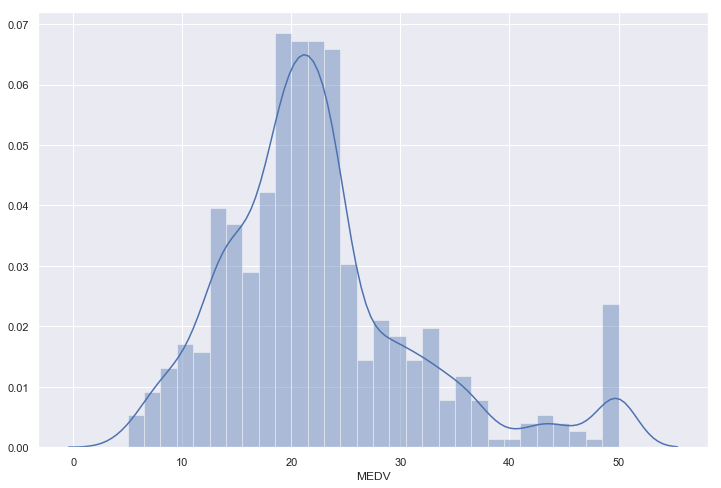

In [17]:
# Check if the target variable is normally distributed
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

###### Correlation Plot

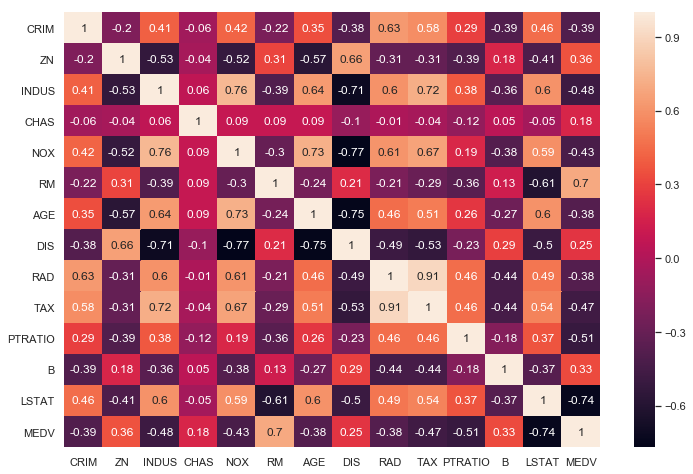

In [18]:
#correlation plot
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# inference - corrplot : MEDV has high positve correlation with Vraible RM which is 0.7 and LSTAT : -0.74## scatter plot

###### Scatter  Plot

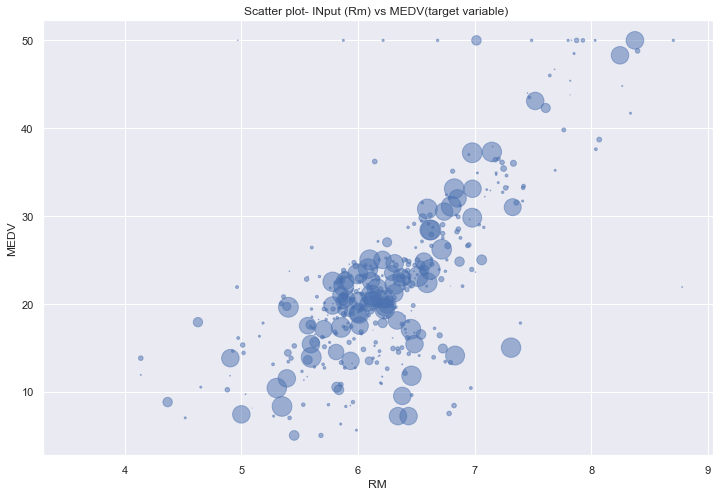

In [20]:
plt.scatter(boston.RM, boston.MEDV, s=boston, alpha=0.5)
plt.title('Scatter plot- INput (Rm) vs MEDV(target variable) ')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [21]:
# inference : strong positive correlation between RM and MEDV

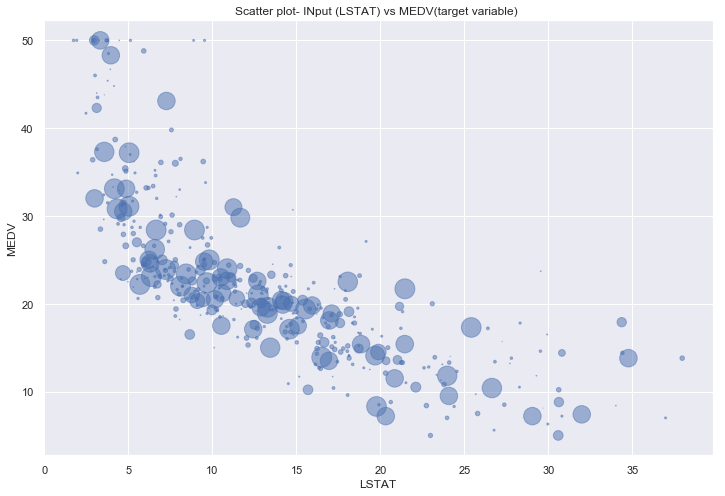

In [22]:
## scatter plot
plt.scatter(boston.LSTAT, boston.MEDV, s=boston, alpha=.5)
plt.title('Scatter plot- INput (LSTAT) vs MEDV(target variable) ')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [ ]:
# inference : Lstat vs MEDV show strong negative correlation

##### Box Plot

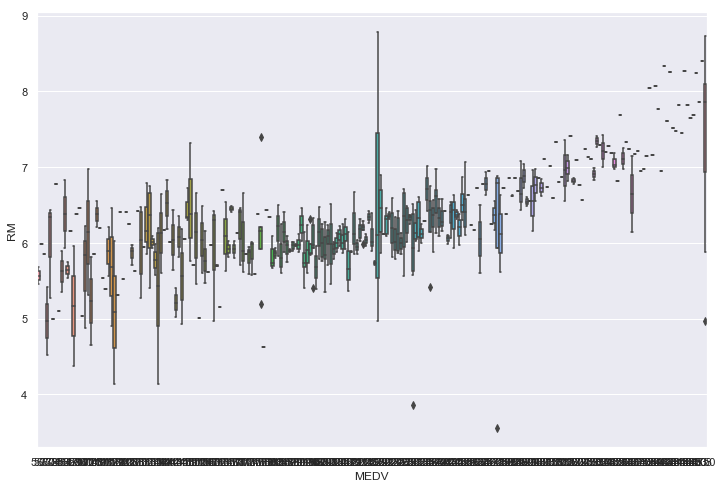

In [25]:
sns.boxplot(x='MEDV', y='RM', data=boston)

#### Outlier calculation

In [26]:
boston['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [29]:
## Outlier calculation , Q3+1.5IQR and Q1 + 1.5IQR 
# IQR = Q3-Q1

Upper_limit = 25 + 1.5 * (25-17)
Lower_limit = 17 - 1.5 * (25-17)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 37.0
Lower_limit : 5.0


In [39]:
# check for the data without the outliers

boston_ul =boston[boston['MEDV']>Upper_limit]
print(boston_ul.shape)
boston_ll = boston[boston['MEDV']<Lower_limit]
boston_ll.shape

(37, 14)


(0, 14)

#### Remove outliers

In [45]:
#### Remove outliers
boston_no_outliers = boston[boston['MEDV']<37]

boston_no_outliers.shape

(468, 14)

In [46]:
# inference : 37 records has been removed
# data with outlier is stored in boston - 506 records
# data without outlier is stored in boston_no_outliers - 468 records

#### Step 6 : Data Processing

In [52]:
# seperate input and output variable for the data with outliers
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
y = pd.DataFrame(boston_dataset.target)

In [53]:
# data processing for data without outlier
X_no = boston.drop('MEDV', axis=1)
y_no= boston['MEDV']

#### Step 7 : Build regression model with complete data

In [56]:
# Build the mode for the original data which has outliers in it

In [57]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
print('Coefficients:',regressor.coef_)
print('Intercept::', regressor.fit_intercept)
print('R^2 score: ', regressor.score(X,y))


Coefficients: [[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
Intercept:: True
R^2 score:  0.7406426641094095


In [59]:
# R square value is 74% 

In [ ]:
# Build the mode for the  data which has no outliers in it

In [60]:
regressor_no = LinearRegression()
regressor_no.fit(X_no, y_no)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
print('Coefficients:',regressor_no.coef_)
print('Intercept::', regressor_no.fit_intercept)
print('R^2 score: ', regressor_no.score(X_no,y_no))


Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept:: True
R^2 score:  0.7406426641094095


In [63]:
# R square value is 74% , same as that of the model with original data

#### Step 8 : Data Split into train and test

In [ ]:
# data with outlier

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(152, 1)


#### step 9 : Build the model with train data and test the model with test data

In [90]:
lin_reg = LinearRegression()
# train the model with input and output data - train
model = lin_reg.fit(X_train,y_train)

#test the model with input  data - test
y_pred = model.predict(X_test)
lin_reg.fit(X_test,y_pred)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
#Model Evaluation 

In [81]:
from sklearn.metrics import mean_squared_error,r2_score

In [89]:
# model evaluation for training set
y_pred = lin_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_pred)))
print("rmse:",rmse)
# R square value - training dataset
r2 =  r2_score(y_train, y_pred)
print("R- Square:",r2)

rmse: 4.4674623461466405
R- Square: 0.7645451026942549


In [92]:
# model evaluation for testing set
y_pred = lin_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("rmse:",rmse)
r2 =  r2_score(y_test, y_pred)
print("R- Square:",r2)

rmse: 5.214975145375417
R- Square: 0.6733825506400177


#### OLS - model summary 

In [69]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:04:11   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Inference : both the test and the train outputs are same so its not over or underfit

In [66]:
# data with out outlier

In [93]:
from sklearn.model_selection import train_test_split
X_train_no, X_test_no , y_train_no, y_test_no = train_test_split(X_no,y_no, test_size = 0.30, random_state = 0)
print(X_train_no.shape)
print(X_test_no.shape)
print(y_test_no.shape)

(354, 13)
(152, 13)
(152,)


In [94]:
lin_reg_no = LinearRegression()
# train the model with input and output data - train
model_no = lin_reg_no.fit(X_train_no,y_train_no)

#test the model with input  data - test
y_pred_no = model_no.predict(X_test_no)
lin_reg_no.fit(X_test_no,y_pred_no)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
# model evaluation for training set
y_pred_no = lin_reg_no.predict(X_train_no)
rmse_no = (np.sqrt(mean_squared_error(y_train_no, y_pred_no)))
print("rmse:",rmse_no)
# R square value - training dataset
r2_no =  r2_score(y_train_no, y_pred_no)
print("R- Square:",r2_no)

rmse: 4.4674623461466405
R- Square: 0.7645451026942549


In [96]:
# model evaluation for testing set
y_pred_no = lin_reg_no.predict(X_test_no)
rmse_no = (np.sqrt(mean_squared_error(y_test_no, y_pred_no)))
print("rmse:",rmse_no)
r2_no =  r2_score(y_test_no, y_pred_no)
print("R- Square:",r2_no)

rmse: 5.214975145375432
R- Square: 0.6733825506400161


#### ols - model summary

In [97]:
import statsmodels.api as sm
model = sm.OLS(y_no, X_no).fit()
predictions = model.predict(X_no) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:18:49   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 10 : Model Tuning

#### Model 1 - based on EDA, use only 2 input variable

In [99]:
# RM - Has strong positve correlation and LSTAT has strong negative correlation. Lets use only those as input variable
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

In [100]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor_m1 = LinearRegression()
regressor_m1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
# model evaluation for training set
y_pred = regressor_m1.predict(X_train)


rmse = (np.sqrt(mean_squared_error(Y_train, y_pred)))
rmse


5.439444824722078

In [104]:
# R square value - training dataset
r2 =  r2_score(Y_train, y_pred)
r2

0.6509440237430768

In [105]:
print("Training dataset - model performance")
print('RMSE -',(rmse))
print('R2 score - ',(r2))


Training dataset - model performance
RMSE - 5.439444824722078
R2 score -  0.6509440237430768


In [106]:
# model evaluation for test set
y_pred = regressor_m1.predict(X_test)


rmse = (np.sqrt(mean_squared_error(Y_test, y_pred)))
rmse

5.72058316020447

In [107]:
# R square value - test dataset
r2 =  r2_score(Y_test, y_pred)
r2

0.6069792285352371

In [108]:
print("Test dataset - model performance")
print('RMSE -',(rmse))
print('R2 score - ',(r2))


Test dataset - model performance
RMSE - 5.72058316020447
R2 score -  0.6069792285352371


#### Model 3 - Scale all the variables

In [109]:
# Seperate all the input into 1 specific variable and the target alone in a new variable y
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
y = pd.DataFrame(boston_dataset.target)

#Data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [110]:
#scaling
from sklearn.preprocessing import StandardScaler
sc_X =  StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [111]:
# Build regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor_m1 = LinearRegression()
regressor_m1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
# model evaluation for training set
y_pred = regressor_m1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_pred)))
# R square value - training dataset
r2 =  r2_score(Y_train, y_pred)
print("Training dataset - model performance")
print('RMSE -',(rmse))
print('R2 score - ',(r2))

Training dataset - model performance
RMSE - 4.4674623461466405
R2 score -  0.7645451026942549


In [113]:
# model evaluation for test set
y_pred = regressor_m1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred)))
# R square value - test dataset
r2 =  r2_score(Y_test, y_pred)
print("Test dataset - model performance")
print('RMSE -',(rmse))
print('R2 score - ',(r2))

Test dataset - model performance
RMSE - 5.214975145375403
R2 score -  0.6733825506400195


#### Model 4 - Backward elimination

In [114]:
import statsmodels.formula.api as sm

In [115]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:28:53   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
# 506 is number of observation
X = np.append(arr = np.ones((506,1)).astype(int),values = X, axis = 1)


In [118]:
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]

In [119]:
regressor_OSL = sm.OLS(endog = y , exog = X_opt).fit()
regressor_OSL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     89.01
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          4.90e-115
Time:                        10:29:33   Log-Likelihood:                -1548.6
No. Observations:                 506   AIC:                             3123.
Df Residuals:                     493   BIC:                             3178.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6526      5.368      3.848      0.000      10.106      31.199
x1            -0.1599      0.036     -4.467      0.000      -0.230      -0.090
x2             0.0389      0.015      2.573      0.010       0.009       0.069
x3            -0.0279      0.068     -0.413      0.680      -0.161       0.105
x4             3.2166      0.948      3.393      0.001       1.354       5.079
x5           -20.4846      4.201     -4.877      0.000     -28.738     -12.231
x6             6.1231      0.389     15.731      0.000       5.358       6.888
x7            -0.0459      0.014     -3.356      0.001      -0.073      -0.019
x8            -1.5549      0.220     -7.077      0.000      -1.987      -1.123
x9             0.2816      0.073      3.852      0.000       0.138       0.425
x10           -0.0117      0.004     -2.832      0.005      -0.020      -0.004
x11           -1.0142      0.144     -7.040      0.000      -1.297      -0.731
x12            0.0136      0.003      4.657      0.000       0.008       0.019
==============================================================================
Omnibus:                      267.269   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2542.250
Skew:                           2.108   Prob(JB):                         0.00
Kurtosis:                      13.139   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
# inference : X3 is not significant

In [121]:
X_opt = X[:,[0,1,2,4,5,6,7,8,9,10,11,12]]
regressor_OSL = sm.OLS(endog = y , exog = X_opt).fit()
regressor_OSL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     97.25
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          5.27e-116
Time:                        10:30:19   Log-Likelihood:                -1548.7
No. Observations:                 506   AIC:                             3121.
Df Residuals:                     494   BIC:                             3172.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7301      5.360      3.868      0.000      10.199      31.261
x1            -0.1596      0.036     -4.462      0.000      -0.230      -0.089
x2             0.0395      0.015      2.631      0.009       0.010       0.069
x3             3.1778      0.943      3.371      0.001       1.326       5.030
x4           -20.9542      4.041     -5.186      0.000     -28.893     -13.015
x5             6.1484      0.384     16.009      0.000       5.394       6.903
x6            -0.0461      0.014     -3.372      0.001      -0.073      -0.019
x7            -1.5359      0.215     -7.155      0.000      -1.958      -1.114
x8             0.2899      0.070      4.131      0.000       0.152       0.428
x9            -0.0125      0.004     -3.355      0.001      -0.020      -0.005
x10           -1.0222      0.143     -7.166      0.000      -1.302      -0.742
x11            0.0137      0.003      4.684      0.000       0.008       0.019
==============================================================================
Omnibus:                      267.350   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2546.872
Skew:                           2.108   Prob(JB):                         0.00
Kurtosis:                      13.150   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
# remove x1,x2,x4,x10

In [123]:
X_opt = X[:,[2,4,5,6,7,8,10,11,12]]
regressor_OSL = sm.OLS(endog = y , exog = X_opt).fit()
regressor_OSL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1088.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          1.61e-320
Time:                        11:21:28   Log-Likelihood:                -1566.4
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     497   BIC:                             3189.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0335      0.015      2.180      0.030       0.003       0.064
x2             3.5774      0.969      3.692      0.000       1.674       5.481
x3           -12.5503      3.280     -3.827      0.000     -18.994      -6.106
x4             7.2580      0.284     25.547      0.000       6.700       7.816
x5            -0.0506      0.014     -3.606      0.000      -0.078      -0.023
x6            -1.1911      0.201     -5.913      0.000      -1.587      -0.795
x7            -0.0044      0.002     -1.941      0.053      -0.009    5.28e-05
x8            -0.7032      0.112     -6.267      0.000      -0.924      -0.483
x9             0.0168      0.003      5.932      0.000       0.011       0.022
==============================================================================
Omnibus:                      285.713   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3463.442
Skew:                           2.206   Prob(JB):                         0.00
Kurtosis:                      15.034   Cond. No.                     7.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 5 - optimized model

In [124]:
# Data preparation
X = pd.DataFrame(np.c_[boston['INDUS'],boston['NOX'], boston['RM'],boston['AGE'],boston['DIS'],boston['RAD'],boston['PTRATIO'],boston['B'],boston['LSTAT']], 
                 columns = ['INDUS','NOX','RM','AGE','DIS','RAD','PTRATIO','B','LSTAT'])
y = boston['MEDV']

In [125]:
#Data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 9)
(152, 9)
(354,)
(152,)


In [126]:
# Build regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor_m1 = LinearRegression()
regressor_m1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
# model evaluation for training set
y_pred = regressor_m1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_pred)))
# R square value - training dataset
r2 =  r2_score(Y_train, y_pred)
print("Training dataset - model performance")
print('RMSE -',(rmse))
print('R2 score - ',(r2))

Training dataset - model performance
RMSE - 4.656342081599266
R2 score -  0.744214640144675


In [128]:
# model evaluation for test set
y_pred = regressor_m1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred)))
# R square value - test dataset
r2 =  r2_score(Y_test, y_pred)
print("Test dataset - model performance")
print('RMSE -',(rmse))
print('R2 score - ',(r2))	


Test dataset - model performance
RMSE - 5.406514887818212
R2 score -  0.6489494129643832


#### model 6 - Based on multi collinearity

In [130]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     141.1
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          1.10e-130
Time:                        11:25:14   Log-Likelihood:                -1518.9
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     496   BIC:                             3100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4533      5.238      6.577      0.000      24.161      44.745
INDUS         -0.0493      0.057     -0.864      0.388      -0.162       0.063
NOX          -17.7904      3.937     -4.518      0.000     -25.527     -10.054
RM             4.1508      0.427      9.719      0.000       3.312       4.990
AGE           -0.0021      0.014     -0.157      0.876      -0.029       0.025
DIS           -1.2273      0.187     -6.563      0.000      -1.595      -0.860
RAD            0.0939      0.038      2.478      0.014       0.019       0.168
PTRATIO       -1.1201      0.128     -8.751      0.000      -1.372      -0.869
B              0.0111      0.003      4.038      0.000       0.006       0.017
LSTAT         -0.5518      0.052    -10.672      0.000      -0.653      -0.450
==============================================================================
Omnibus:                      179.525   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              830.499
Skew:                           1.515   Prob(JB):                    4.56e-181
Kurtosis:                       8.496   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
vif,3.20718,4.346973,1.8803,3.047922,3.237161,2.273748,1.603549,1.324052,2.846725


In [133]:
## 
X = boston[['CRIM', 'CHAS', 'RM', 'PTRATIO', 'B']]
y = boston['MEDV']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.13917718  2.92717785  7.2667075  -0.99092991  0.01681586]
Intercept: -10.544986213558001
R^2 score: 0.6248440235916861


#### Model 7 - RFE - Recursive Feature elemination

In [150]:
# Data preparation

X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
y = pd.DataFrame(boston_dataset.target)

In [151]:
from sklearn.feature_selection import RFE
model = LinearRegression()

In [152]:
#Initializing RFE model
rfe = RFE(model, 11)

In [153]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True  True  True False
  True]
[1 1 1 1 1 1 3 1 1 1 1 2 1]


In [154]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX','PTRATIO', 'LSTAT']

In [155]:
# Data preparation
X = pd.DataFrame(np.c_[boston['CRIM'],boston['ZN'], boston['INDUS'],boston['CHAS'],boston['NOX'],boston['RM'],boston['DIS'],boston['RAD'],boston['TAX'],boston['PTRATIO'],boston['LSTAT']], 
                 columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','LSTAT'])
y = boston['MEDV']

In [156]:
#Data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(354, 11)
(152, 11)
(354,)
(152,)


In [157]:
# Build regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor_m1 = LinearRegression()
regressor_m1.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
# model evaluation for training set
y_pred = regressor_m1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_pred)))
# R square value - training dataset
r2 =  r2_score(Y_train, y_pred)
print("Training dataset - model performance")
print('RMSE -',(rmse))
print('R2 score - ',(r2))

Training dataset - model performance
RMSE - 4.497958718287218
R2 score -  0.761319545135019


In [159]:
# model evaluation for test set
y_pred = regressor_m1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred)))
# R square value - test dataset
r2 =  r2_score(Y_test, y_pred)
print("Test dataset - model performance")
print('RMSE -',(rmse))
print('R2 score - ',(r2))	

Test dataset - model performance
RMSE - 5.292191321402398
R2 score -  0.6636387407857864


##### Model 8 - Polynomial features

In [160]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures()

# Transformed the Input Variabes for a better modelling
x = pf.fit_transform(X)

# Building the Model
ins_model = sm.OLS(y,x).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(x) # Making Prediction on X values 
st_residual = ins_model.get_influence().resid_studentized_internal

# Find the Rsquare
print('R_squared value : ', ins_model.rsquared * 100)
print('Adj_R_squared value : ', ins_model.rsquared_adj * 100)

R_squared value :  90.90382877109187
Adj_R_squared value :  89.2923858494205
